## R for Data Science



The contents here is based on [R for Data Science](https://r4ds.had.co.nz/). Check [chapter 3, Data Visualization](https://r4ds.had.co.nz/data-visualisation.html) and [chapter 5, Data Manipulation](https://r4ds.had.co.nz/transform.html) for more details.

Here, I'd like to cover
- [__Data Visualization__](https://r4ds.had.co.nz/data-visualisation.html) using _ggplot_
- [__Data Manipulation__](https://r4ds.had.co.nz/transform.html) using _dplyr_ 

### Data Visualization

First call tidyverse library

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.2.1     √ purrr   0.3.2
√ tibble  2.1.3     √ dplyr   0.8.3
√ tidyr   0.8.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


We will play with `mpg`data containing observations collected by the US Environmental Protection Agency on 38 models of car.

In [2]:
mpg[1:5,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Aesthetic Mappings


``` r
ggplot(data = data, mapping = aes(x = , y=, color= , size= , alpha= , shape=) )
```

#### x and y

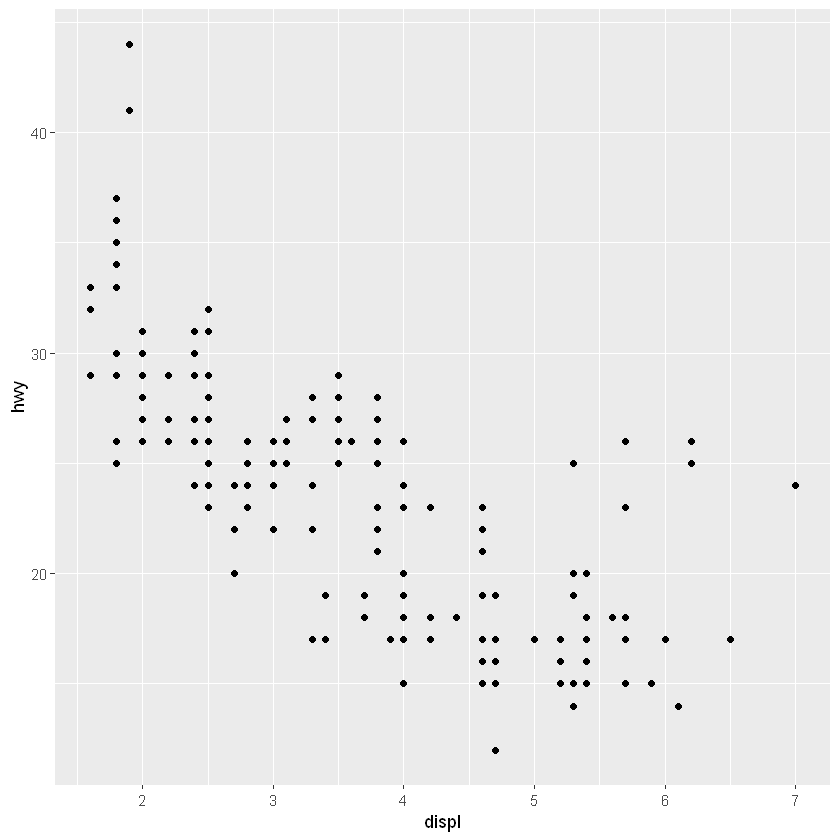

In [4]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy) ) +
    geom_point()

#### color

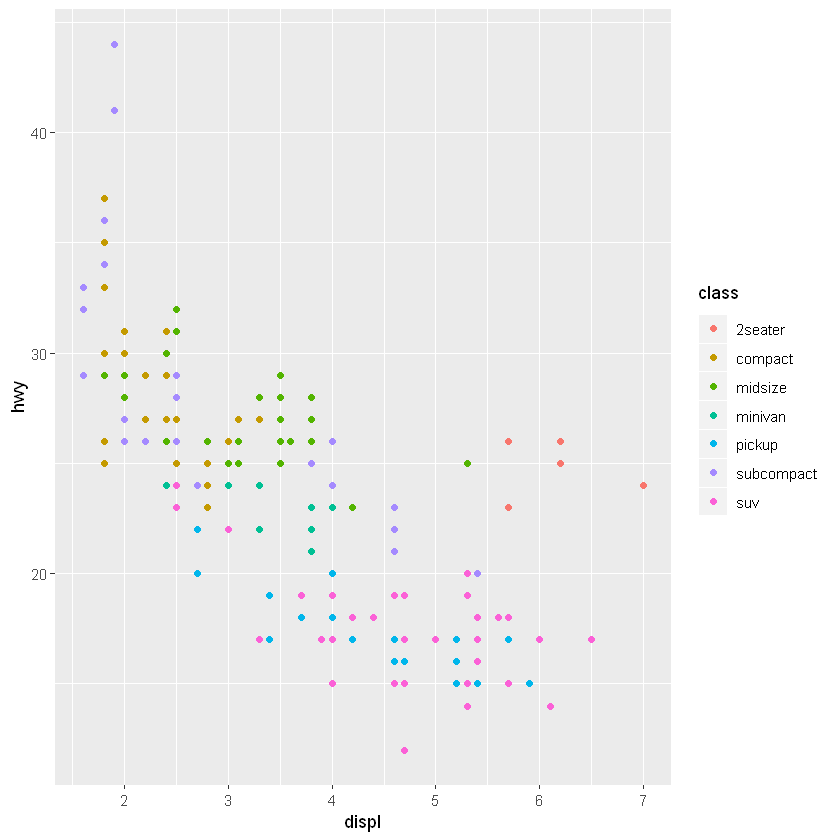

In [5]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = class) ) +
    geom_point()

#### size

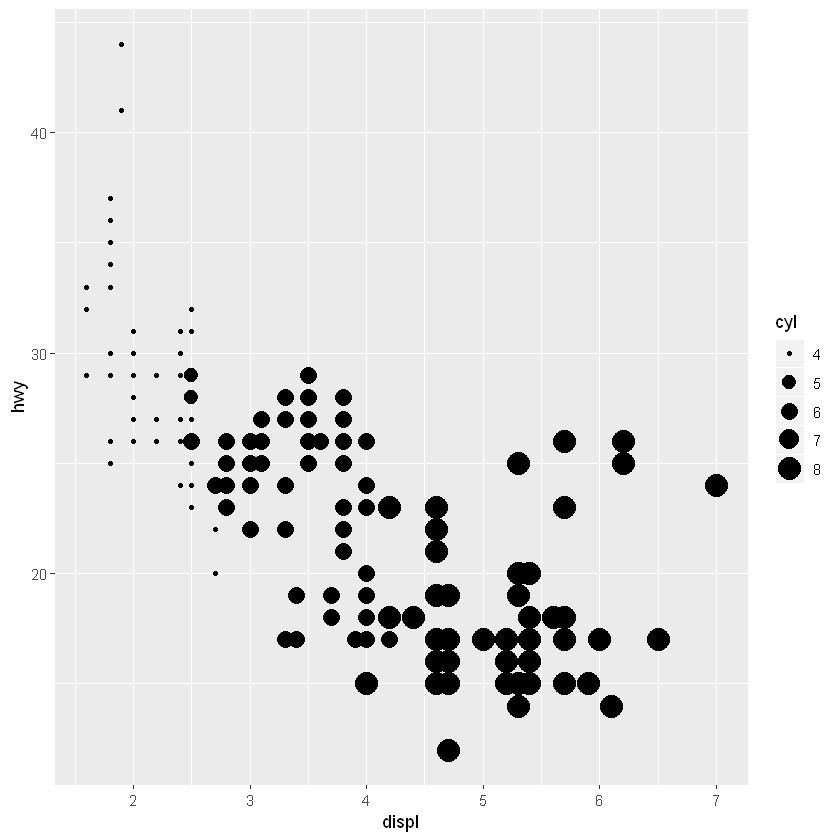

In [6]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, size = cyl) ) +
    geom_point()

#### alpha

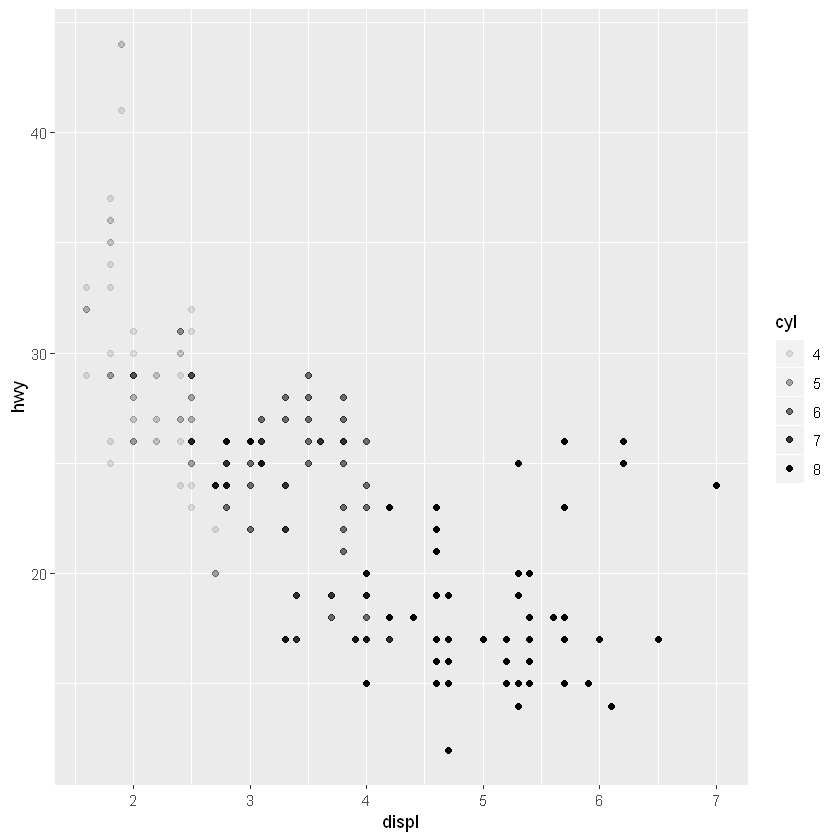

In [7]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, alpha = cyl) ) +
    geom_point()

#### shape

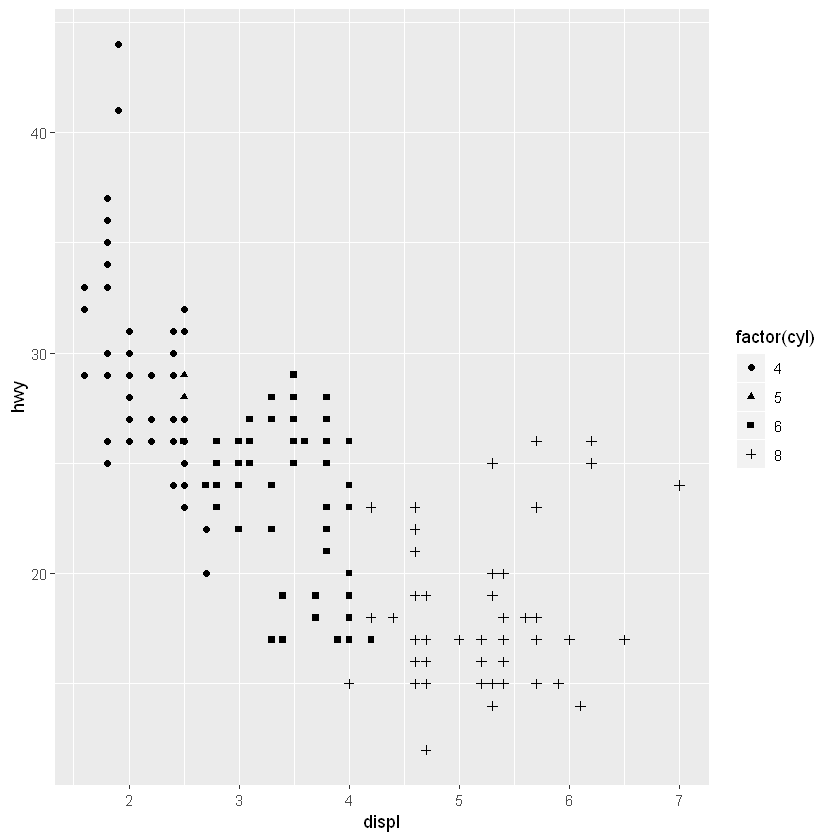

In [11]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, shape = factor(cyl)) ) +
    geom_point()

### Facets

Split your plot into facets (facet_wrap, facet_grid)

- __facet_wrap__ for 1d split
- __facet_grid__ for 2d split



#### facet_wrap

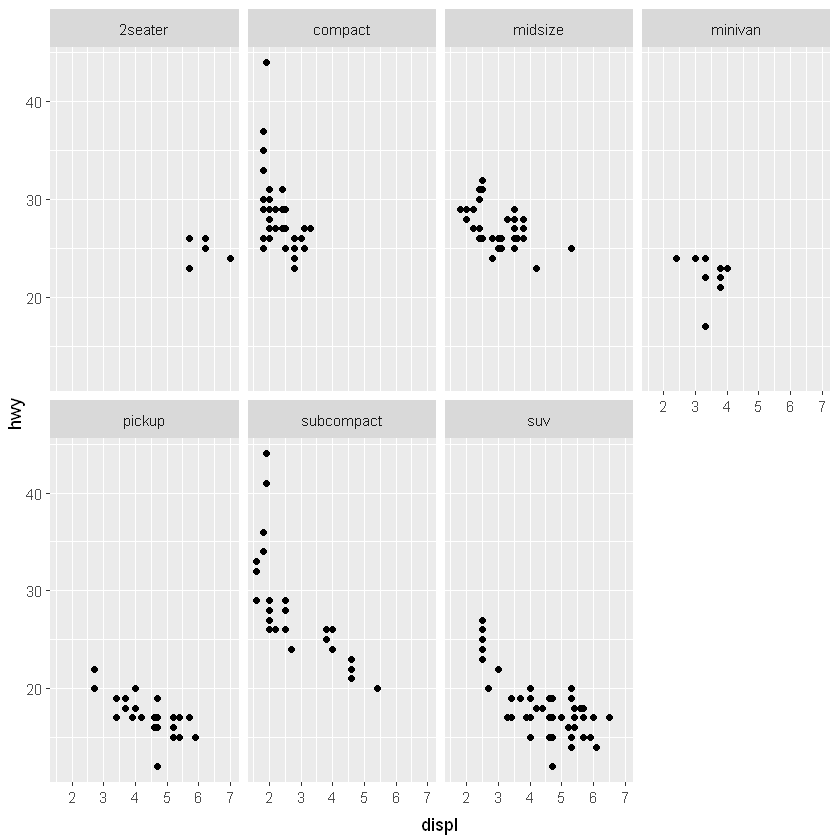

In [12]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() + 
  facet_wrap(~ class, nrow = 2)

#### facet_grid

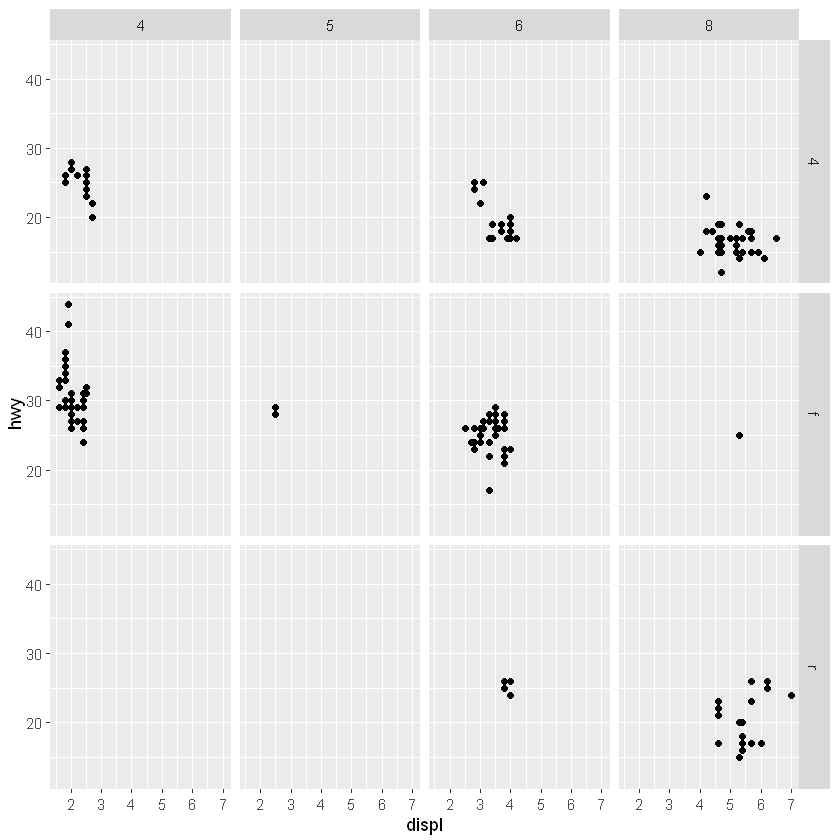

In [13]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() + 
  facet_grid(drv ~ cyl)

### Geometric objects

Functions start with **geom_**

- Plot geometrical objects 

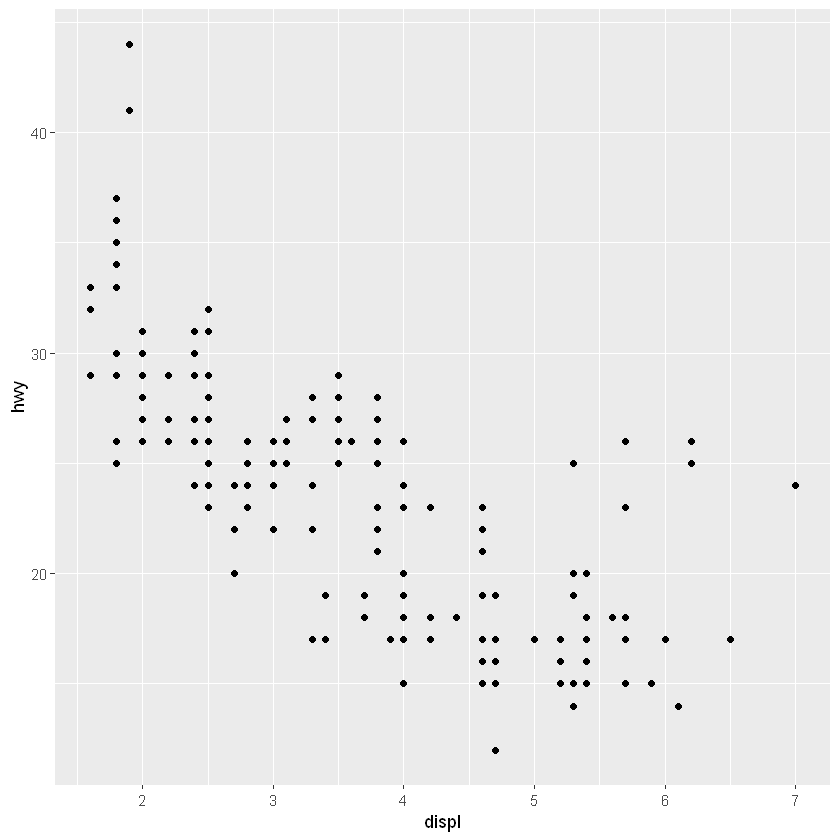

In [14]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


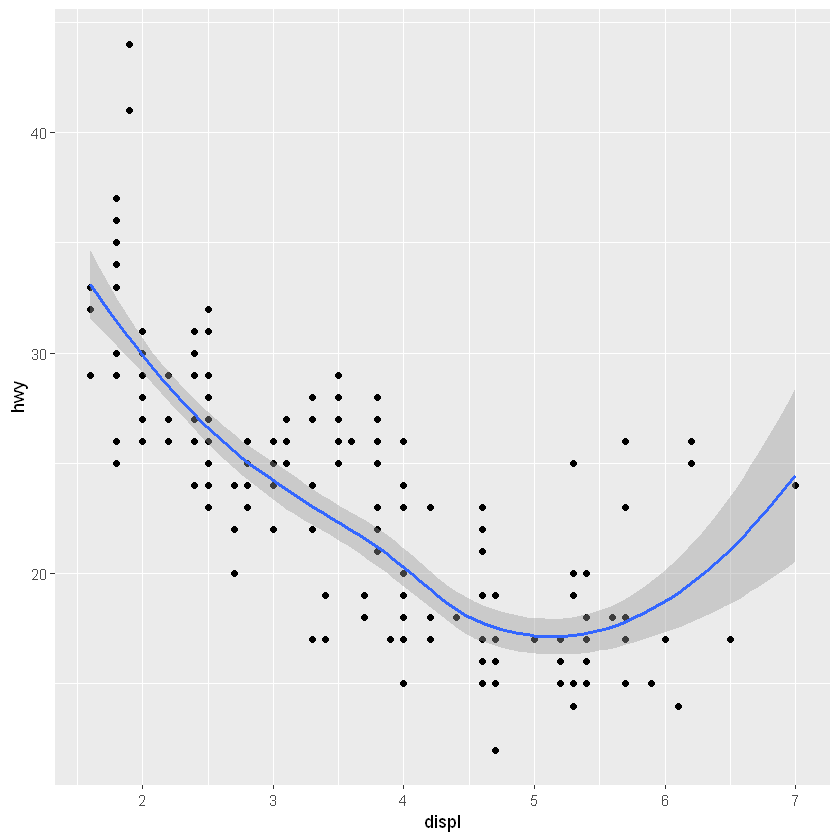

In [16]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_smooth()

#### geom_bar

![geom_bar](Figs/geom_bar.png)

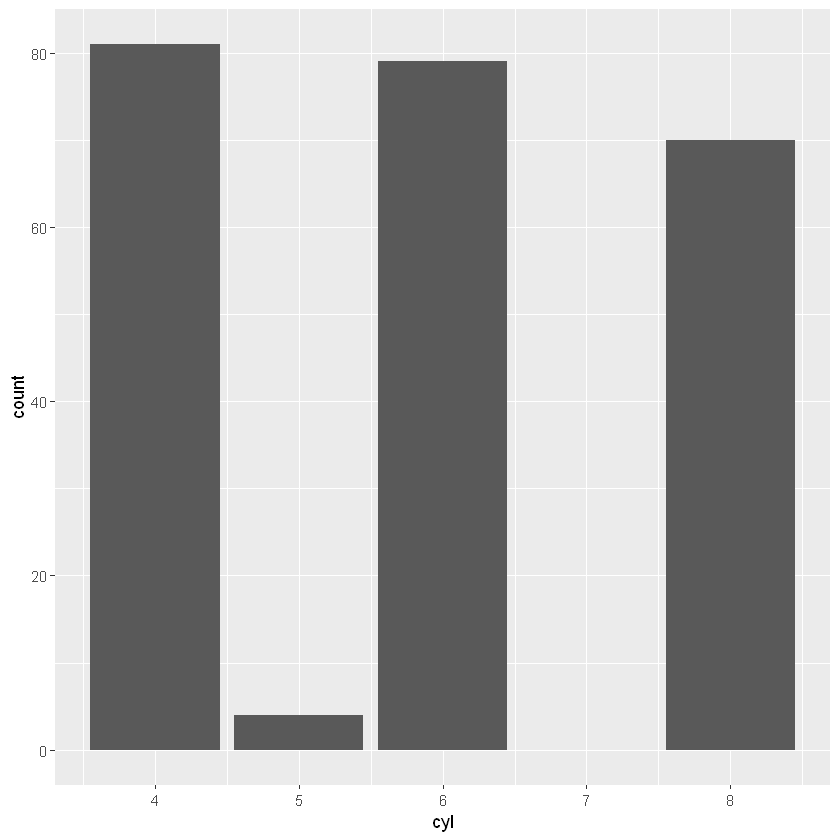

In [17]:
ggplot(data = mpg, aes(x = cyl) ) + 
  geom_bar()

In [19]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
demo

cut,freq
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


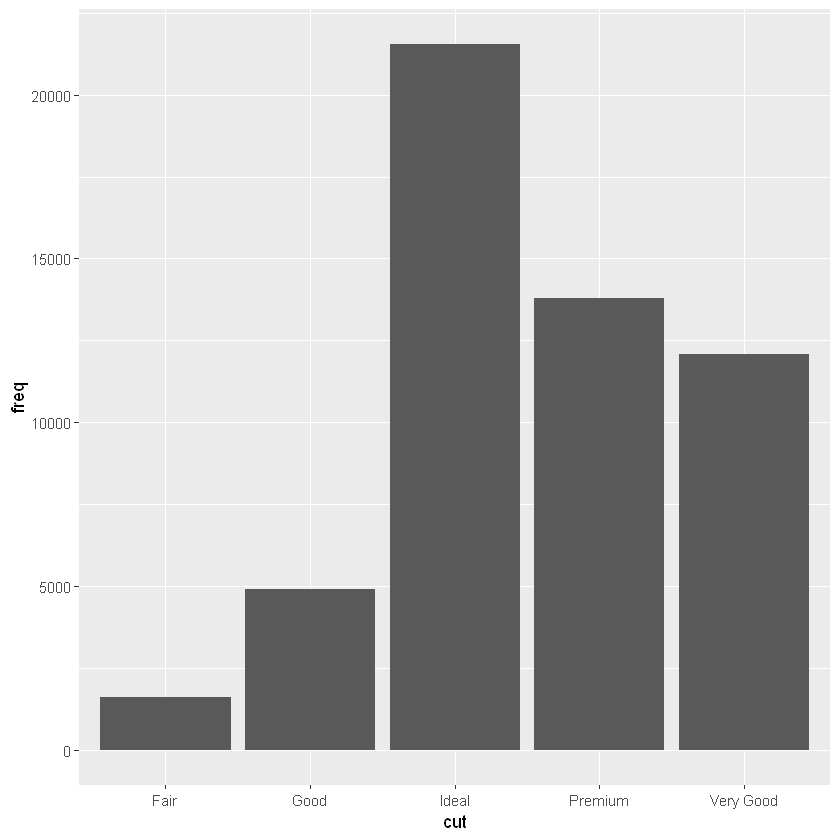

In [20]:
ggplot(demo, aes(x = cut, y = freq)) +
  geom_bar(stat = "identity")

#### Theme

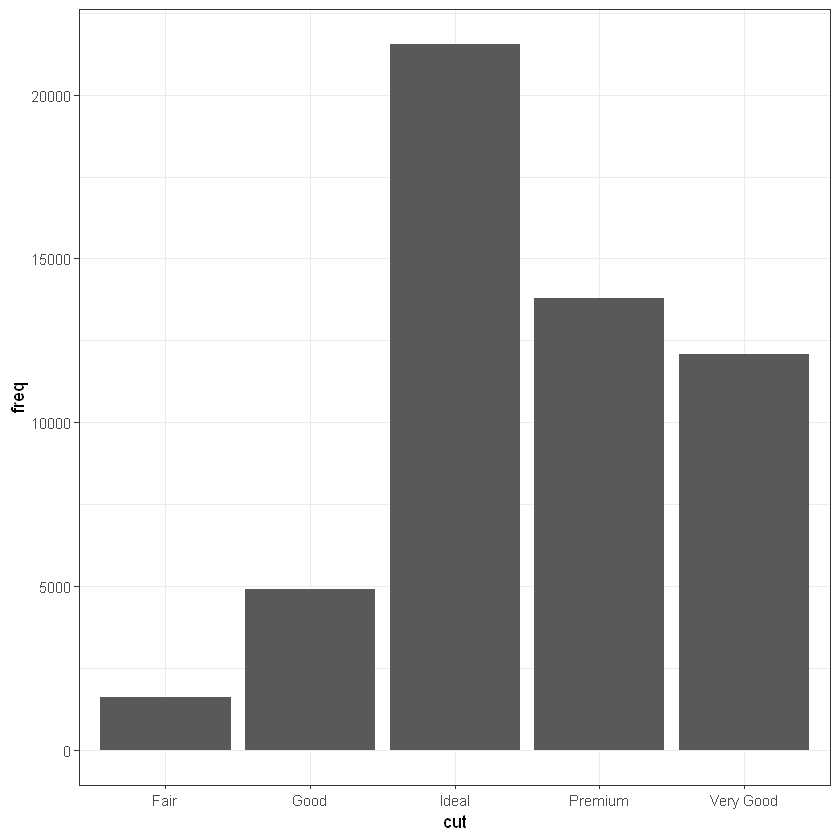

In [21]:
ggplot(demo, aes(x = cut, y = freq)) +
  geom_bar(stat = "identity") + 
  theme_bw()

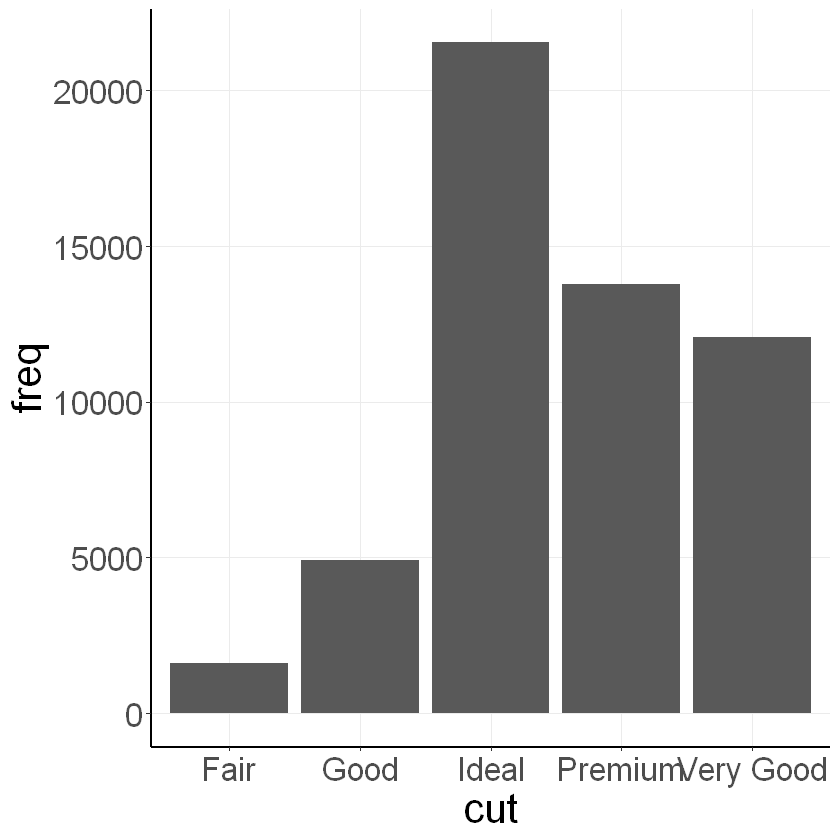

In [25]:
ggplot(demo, aes(x = cut, y = freq)) +
  geom_bar(stat = "identity") + 
  theme_bw() + 
  theme(panel.border = element_blank(),
        axis.line = element_line(size = .8, color = "black"),
        panel.grid.minor = element_blank(),
        text = element_text(size = 25)
       )

### Data manipulation

`x %>% f(y)` turns into `f(x,y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x,y), z)`

#### pipe operator

![pipe](Figs/pipe.png)

#### filter

filtering rows

In [27]:
mpg[1:10,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [30]:
mpg %>% filter(year == 1999) 

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv


In [31]:
mpg %>% filter(year == 1999, model == 'passat') 

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [32]:
mpg %>% filter(year == 1999, model %in% c('passat', 'new beetle') )

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact
volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


#### select

Return a subset of the columns


In [33]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class)

model,displ,class
new beetle,1.9,subcompact
new beetle,1.9,subcompact
new beetle,2.0,subcompact
new beetle,2.0,subcompact
passat,1.8,midsize
passat,1.8,midsize
passat,2.8,midsize
passat,2.8,midsize


#### arrange

Reorders the rows according to single or multiple variables


In [34]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(displ)

model,displ,class
passat,1.8,midsize
passat,1.8,midsize
new beetle,1.9,subcompact
new beetle,1.9,subcompact
new beetle,2.0,subcompact
new beetle,2.0,subcompact
passat,2.8,midsize
passat,2.8,midsize


In [35]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(desc(displ))

model,displ,class
passat,2.8,midsize
passat,2.8,midsize
new beetle,2.0,subcompact
new beetle,2.0,subcompact
new beetle,1.9,subcompact
new beetle,1.9,subcompact
passat,1.8,midsize
passat,1.8,midsize


#### mutate

Add columns from existing data 


In [39]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(desc(displ)) %>%
   mutate(displ10 = displ*10,
         model2 = car::recode(model, "'passat'='p'; 'new beetle'='nb' "),
         ex_missing = car::recode(displ, "2.0 = '20'; 2.8 = '28'; else = NA"))

model,displ,class,displ10,model2,ex_missing
passat,2.8,midsize,28,p,2.8
passat,2.8,midsize,28,p,2.8
new beetle,2.0,subcompact,20,nb,2.0
new beetle,2.0,subcompact,20,nb,2.0
new beetle,1.9,subcompact,19,nb,NA
new beetle,1.9,subcompact,19,nb,NA
passat,1.8,midsize,18,p,NA
passat,1.8,midsize,18,p,NA


In [48]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(desc(displ)) %>%
   mutate(displ10 = displ*10,
          model2 = car::recode(model, "'passat'='p'; 'new beetle'='nb' "),
          ex_missing = car::recode(displ, "2.0 = '20'; 2.8 = '28'; else = NA"),
          ex_missing = factor(ex_missing, levels = c("28", "20")),
          ex_missing = fct_explicit_na(ex_missing) 
          )

model,displ,class,displ10,model2,ex_missing
passat,2.8,midsize,28,p,28
passat,2.8,midsize,28,p,28
new beetle,2.0,subcompact,20,nb,20
new beetle,2.0,subcompact,20,nb,20
new beetle,1.9,subcompact,19,nb,(Missing)
new beetle,1.9,subcompact,19,nb,(Missing)
passat,1.8,midsize,18,p,(Missing)
passat,1.8,midsize,18,p,(Missing)


#### summarize

Produce summary statistic for each group (using group_by() ) 


In [50]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(desc(displ)) %>%
   mutate(displ10 = displ*10,
          model2 = car::recode(model, "'passat'='p'; 'new beetle'='nb' "),
          ex_missing = car::recode(displ, "2.0 = '20'; 2.8 = '28'; else = NA"),
          ex_missing = factor(ex_missing, levels = c("28", "20")),
          ex_missing = fct_explicit_na(ex_missing) 
          ) %>% 
   group_by(model) %>%          
   summarize( n = n(),
            mean_displ = mean(displ), 
            sd_displ = sd(displ))
       

model,n,mean_displ,sd_displ
new beetle,4,1.95,0.05773503
passat,4,2.30,0.57735027


#### ggplot followed by dyplyr manipulation

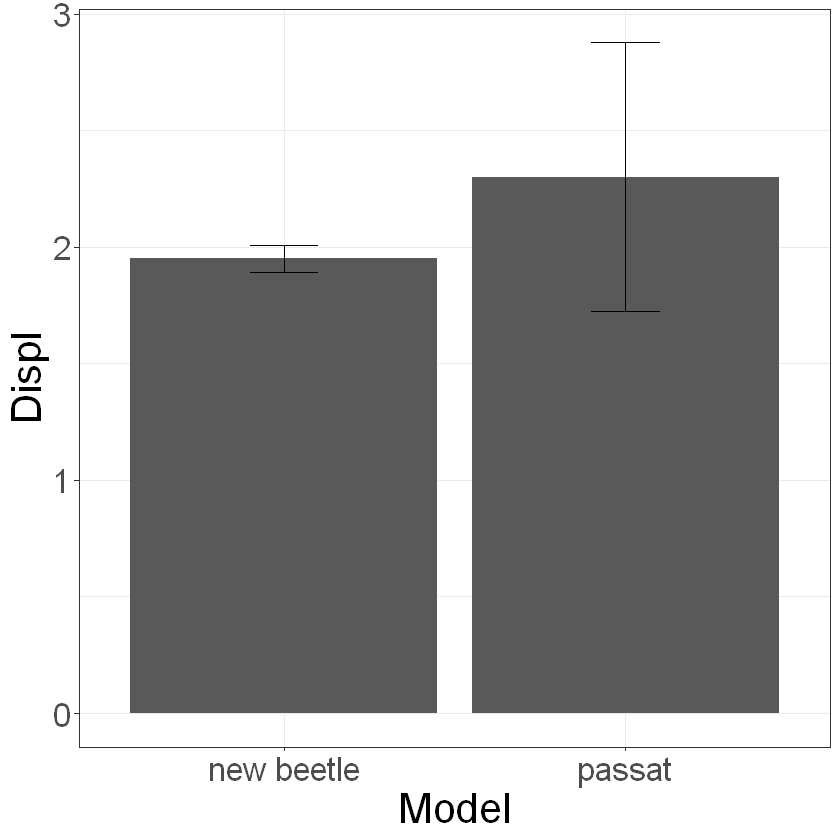

In [59]:
mpg %>% 
   filter(year == 1999, model %in% c('passat', 'new beetle') ) %>%
   select(model, displ, class) %>%
   arrange(desc(displ)) %>%
   mutate(displ10 = displ*10,
          model2 = car::recode(model, "'passat'='p'; 'new beetle'='nb' "),
          ex_missing = car::recode(displ, "2.0 = '20'; 2.8 = '28'; else = NA"),
          ex_missing = factor(ex_missing, levels = c("28", "20")),
          ex_missing = fct_explicit_na(ex_missing) 
          ) %>% 
   group_by(model) %>%          
   summarize( n = n(),
            mean_displ = mean(displ), 
            sd_displ = sd(displ)) %>% 
   ggplot(aes(x = model, y = mean_displ )) + 
   geom_bar(stat = "identity") +
   geom_errorbar(aes(ymin=mean_displ-sd_displ, ymax=mean_displ+sd_displ), width=.2) +
   theme_bw() + 
   theme( text = element_text(size = 25) ) + 
   xlab('Model') + 
   ylab('Displ')